<a href="https://colab.research.google.com/github/beyzanurbayir/PythonProjects/blob/master/StudentGradeAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bu çalışma Seaborn, pandas dataset okuma, merge, join, concatenate, Matplotlib, missing veriler ve groupBy konularını içeren bir veri analizi ve görselleştirme işlemleri konusunda pratiklik sağlamak amacıyla yapılmıştır.



Bu proje, öğrenci notları analizi ve görselleştirmesi üzerine kuruludur. İlk olarak, iki farklı veri kümesi oluşturularak öğrencilerin Matematik ve Fizik derslerindeki notları bir araya getirilmiştir. Eksik veriler, ders notlarının ortalamaları kullanılarak doldurulmuştur. Yeni öğrenci verileri eklenerek veri kümesi genişletilmiş ve tüm öğrencilerin ortalama notları hesaplanmıştır. Gruplama işlemi ile her öğrencinin ortalama notları hesaplanarak özetlenmiştir. Son olarak, Seaborn ve Matplotlib kullanılarak öğrenci notlarının görselleştirilmesi yapılmış, bar grafiği ve dağılım grafiği ile verilerin daha anlaşılır hale gelmesi sağlanmıştır.

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [109]:
data1={
    'ogrenci':["Cemil","Suat","Yusuf","Orhan"],
    'ID':[1,2,3,4],
    'Fizik':[np.nan,90,75,60]
}

data2={
    'ogrenci':["Sadet","Suat","Yusuf","Orhan"],
    'ID':[5,2,3,4],
    'Matematik':[85,np.nan,75,np.nan]
}

df1=pd.DataFrame(data1)
df2=pd.DataFrame(data2)

print(df1)
print(df2)

  ogrenci  ID  Fizik
0   Cemil   1    NaN
1    Suat   2   90.0
2   Yusuf   3   75.0
3   Orhan   4   60.0
  ogrenci  ID  Matematik
0   Sadet   5       85.0
1    Suat   2        NaN
2   Yusuf   3       75.0
3   Orhan   4        NaN


In [110]:
merged_df=pd.merge(df1,df2,on=['ogrenci','ID'],how='outer')    # Bu kod, `df1` ve `df2` DataFrame'lerini `ogrenci` ve `ID` sütunları üzerinden birleştirir ve
                                                               # her iki DataFrame'de de mevcut olan tüm satırları içeren bir dış birleştirme (outer join) gerçekleştirir.
merged_df

,ogrenci,ID,Fizik,Matematik
0,Cemil,1,NaN,NaN
1,Suat,2,90.0,NaN
2,Yusuf,3,75.0,75.0
3,Orhan,4,60.0,NaN
4,Sadet,5,NaN,85.0


In [111]:
merged_df["Fizik"].fillna(merged_df["Fizik"].mean(),inplace=True)            # merge_df DataFrame'inde Fizik sütunundaki eksik (NaN) değerleri sütunun ortalama değeriyle doldurur.
merged_df["Matematik"].fillna(merged_df["Matematik"].mean(),inplace=True)
print(merged_df)


  ogrenci  ID  Fizik  Matematik
0   Cemil   1   75.0       80.0
1    Suat   2   90.0       80.0
2   Yusuf   3   75.0       75.0
3   Orhan   4   60.0       80.0
4   Sadet   5   75.0       85.0


In [113]:
merged_df['Ortalama'] = merged_df[['Matematik', 'Fizik']].mean(axis=1)  # merge_df DataFrame'inde Matematik ve Fizik sütunlarının ortalamasını hesaplar ve yeni bir sütun olarak ekler.
print(merged_df)

grouped = merged_df.groupby('ogrenci').mean()   # Ortalama notları sınıflara göre gruplayarak hesaplar
print(grouped)


  ogrenci  ID  Fizik  Matematik  Ortalama
0   Cemil   1   75.0       80.0      77.5
1    Suat   2   90.0       80.0      85.0
2   Yusuf   3   75.0       75.0      75.0
3   Orhan   4   60.0       80.0      70.0
4   Sadet   5   75.0       85.0      80.0
          ID  Fizik  Matematik  Ortalama
ogrenci                                 
Cemil    1.0   75.0       80.0      77.5
Orhan    4.0   60.0       80.0      70.0
Sadet    5.0   75.0       85.0      80.0
Suat     2.0   90.0       80.0      85.0
Yusuf    3.0   75.0       75.0      75.0


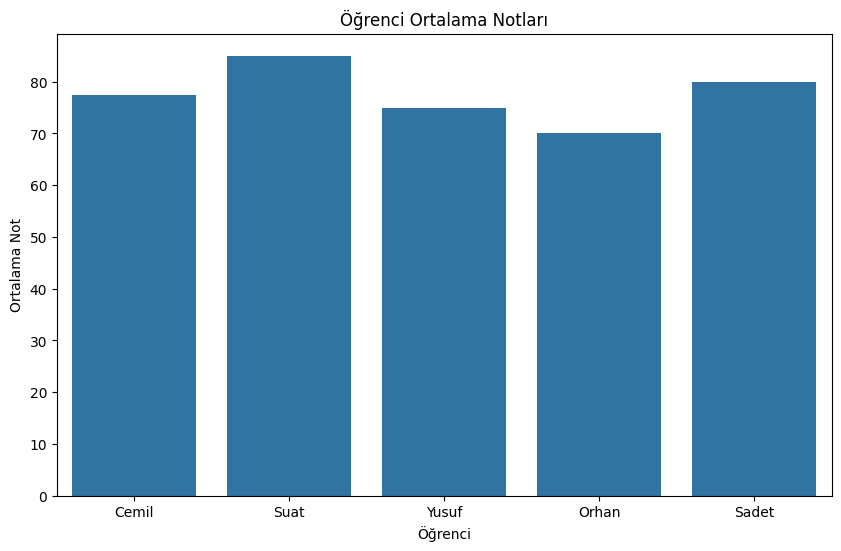

In [114]:
# Seaborn ile Çizim
plt.figure(figsize=(10, 6))
sns.barplot(x='ogrenci', y='Ortalama', data=merged_df)
plt.title('Öğrenci Ortalama Notları')
plt.xlabel('Öğrenci')
plt.ylabel('Ortalama Not')
plt.show()

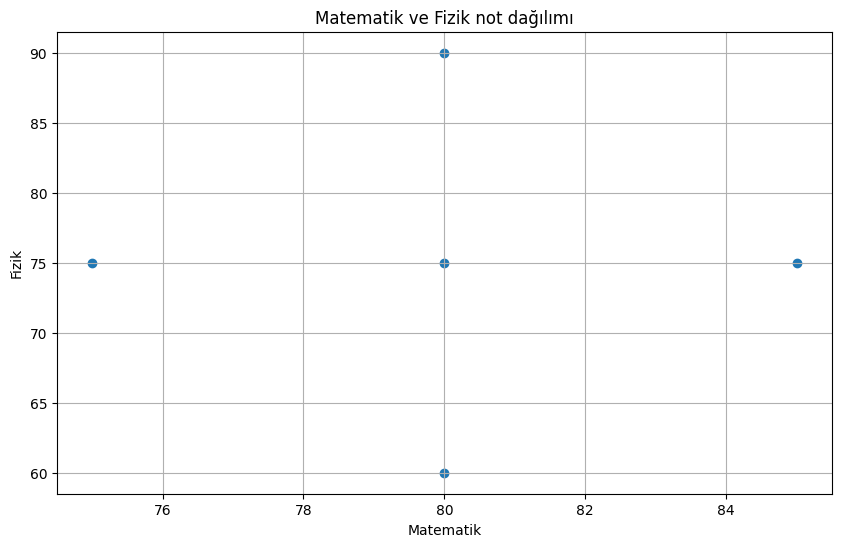

In [115]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Matematik'], merged_df['Fizik'])
plt.title('Matematik ve Fizik not dağılımı')
plt.xlabel('Matematik')
plt.ylabel('Fizik')
plt.grid(True)
plt.show()


In [116]:
data3={
    'ogrenci':["Ayşe","Selin","Mira"],
    'ID':[6,7,8],
    'Fizik':[100,43,25],
    'Matematik':[85,69,50]
}

df3=pd.DataFrame(data3)
print(df3)

  ogrenci  ID  Fizik  Matematik
0    Ayşe   6    100         85
1   Selin   7     43         69
2    Mira   8     25         50


In [117]:
concatenated_df=pd.concat([merged_df,df3], ignore_index=True)
print(concatenated_df)

  ogrenci  ID  Fizik  Matematik  Ortalama
0   Cemil   1   75.0       80.0      77.5
1    Suat   2   90.0       80.0      85.0
2   Yusuf   3   75.0       75.0      75.0
3   Orhan   4   60.0       80.0      70.0
4   Sadet   5   75.0       85.0      80.0
5    Ayşe   6  100.0       85.0       NaN
6   Selin   7   43.0       69.0       NaN
7    Mira   8   25.0       50.0       NaN


In [118]:
concatenated_df['Ortalama'] = concatenated_df[['Matematik', 'Fizik']].mean(axis=1)
print(concatenated_df)


  ogrenci  ID  Fizik  Matematik  Ortalama
0   Cemil   1   75.0       80.0      77.5
1    Suat   2   90.0       80.0      85.0
2   Yusuf   3   75.0       75.0      75.0
3   Orhan   4   60.0       80.0      70.0
4   Sadet   5   75.0       85.0      80.0
5    Ayşe   6  100.0       85.0      92.5
6   Selin   7   43.0       69.0      56.0
7    Mira   8   25.0       50.0      37.5


In [119]:
gruped=concatenated_df.groupby('ogrenci').mean()
print(gruped)

          ID  Fizik  Matematik  Ortalama
ogrenci                                 
Ayşe     6.0  100.0       85.0      92.5
Cemil    1.0   75.0       80.0      77.5
Mira     8.0   25.0       50.0      37.5
Orhan    4.0   60.0       80.0      70.0
Sadet    5.0   75.0       85.0      80.0
Selin    7.0   43.0       69.0      56.0
Suat     2.0   90.0       80.0      85.0
Yusuf    3.0   75.0       75.0      75.0


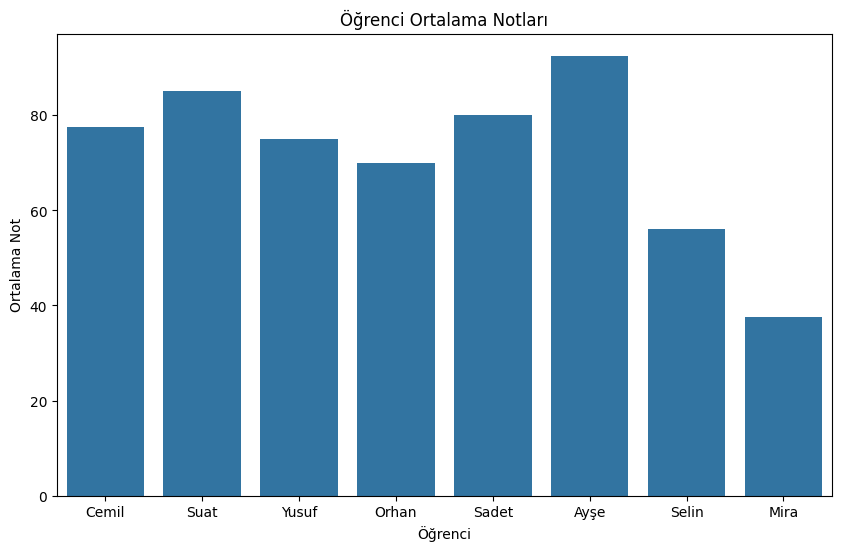

In [120]:
# Seaborn ile Çizim
plt.figure(figsize=(10, 6))
sns.barplot(x='ogrenci', y='Ortalama', data=concatenated_df)
plt.title('Öğrenci Ortalama Notları')
plt.xlabel('Öğrenci')
plt.ylabel('Ortalama Not')
plt.show()

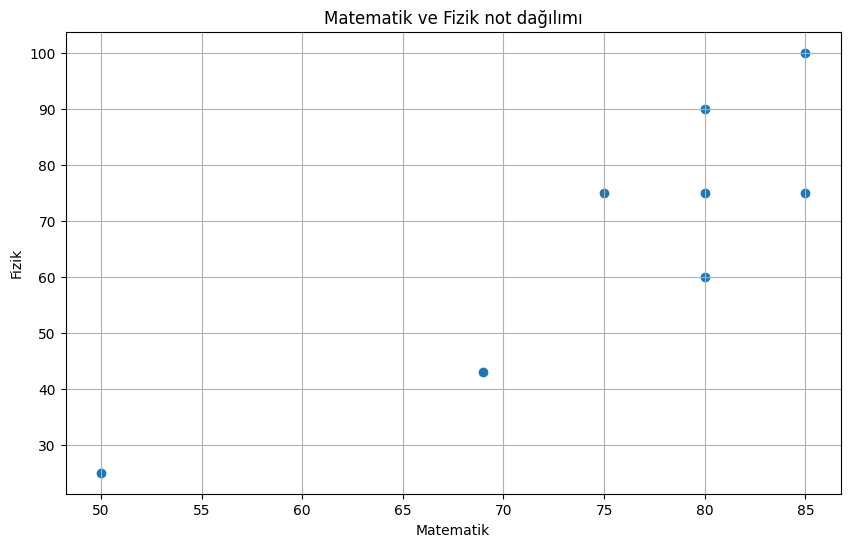

In [121]:
plt.figure(figsize=(10, 6))
plt.scatter(concatenated_df['Matematik'], concatenated_df['Fizik'])
plt.title('Matematik ve Fizik not dağılımı')
plt.xlabel('Matematik')
plt.ylabel('Fizik')
plt.grid(True)
plt.show()